### Import Necessary Module and Set Path 

In [1]:
import sqlite3 as lite
import os
import sys
import numpy as np
import collections
sys.path.insert(0, '../../scripts/')
jupyter_directory = os.getcwd()

In [2]:
import analysis as an

## Run Cyclus Input file

In [3]:
! rm eu_future.sqlite
! cyclus default_input_file.xml

              :                                                               
          .CL:CC CC             _Q     _Q  _Q_Q    _Q    _Q              _Q   
        CC;CCCCCCCC:C;         /_\)   /_\)/_/\\)  /_\)  /_\)            /_\)  
        CCCCCCCCCCCCCl       __O|/O___O|/O_OO|/O__O|/O__O|/O____________O|/O__
     CCCCCCf     iCCCLCC     /////////////////////////////////////////////////
     iCCCt  ;;;;;.  CCCC                                                      
    CCCC  ;;;;;;;;;. CClL.                          c                         
   CCCC ,;;       ;;: CCCC  ;                   : CCCCi                       
    CCC ;;         ;;  CC   ;;:                CCC`   `C;                     
  lCCC ;;              CCCC  ;;;:             :CC .;;. C;   ;    :   ;  :;;   
  CCCC ;.              CCCC    ;;;,           CC ;    ; Ci  ;    :   ;  :  ;  
   iCC :;               CC       ;;;,        ;C ;       CC  ;    :   ; .      
  CCCi ;;               CCC        ;;;.      .C ;   

### The output file should be named 
         
          eu_future.sqlite

In [3]:
# get sqlite cursor and simulation time data
cur = an.get_cursor('hopefully_last.sqlite')
init_year, init_month, duration, timestep = an.get_timesteps(cur)

In [4]:
# get number of reactors and capacity timeseries
an.plot_power(cur)

french_facilities has no values
Sink_Source_Inst has no values
french_facilities has no values
Sink_Source_Inst has no values


In [5]:
# just france

parentid = cur.execute('SELECT agentid FROM agententry WHERE '
                       'Prototype LIKE "%france%" '
                       'AND Kind = "Inst"').fetchone()
entry_exit = cur.execute('SELECT max(value), timeseriespower.agentid, '
                         'parentid, entertime, prototype, entertime + lifetime'
                         ' FROM agententry '
                         'INNER JOIN timeseriespower '
                         'ON agententry.agentid = timeseriespower.agentid '
                         'WHERE parentid = %i '
                         'GROUP BY timeseriespower.agentid' %parentid[0]).fetchall()

init_year, init_month, duration, timestep = an.get_timesteps(cur)
dictionary = {}
lwr_cap = 0
astrid_cap = 0
dictionary['lwr'] = []
dictionary['astrid'] = []
for t in timestep:
    for agent in entry_exit:
        if (agent['entertime'] == t) and agent['prototype'] == 'astrid':
            astrid_cap += agent['max(value)'] * 0.001
        if (agent['entertime'] == t) and agent['prototype'] != 'astrid':
            lwr_cap += agent['max(value)'] * 0.001
        
        if (agent['entertime + lifetime'] == t) and agent['prototype'] == 'astrid':
            astrid_cap -= agent['max(value)'] * 0.001
        if (agent['entertime + lifetime'] == t) and agent['prototype'] != 'astrid':
            lwr_cap -= agent['max(value)'] * 0.001
    dictionary['lwr'].append(lwr_cap)
    dictionary['astrid'].append(astrid_cap)

for i in range(len(dictionary['lwr'])):
    print(dictionary['lwr'][i] + dictionary['astrid'][i])
    
an.stacked_bar_chart(dictionary, timestep,
                  'Years', 'Net_Capacity [GWe]',
                  'Net Capacity vs Time',
                  'france_power_plot', init_year)
            

0
1.2349999999999999
1.2349999999999999
1.2349999999999999
1.2349999999999999
1.2349999999999999
1.2349999999999999
1.2349999999999999
1.2349999999999999
1.2349999999999999
1.2349999999999999
1.2349999999999999
1.2349999999999999
1.2349999999999999
1.2349999999999999
1.2349999999999999
1.2349999999999999
1.2349999999999999
1.7
1.7
1.7
1.7
1.7
1.7
1.7
1.7
1.7
2.24
2.24
2.24
2.24
2.24
2.24
2.24
2.24
2.24
2.24
2.24
2.24
2.24
2.24
2.24
2.24
2.24
2.24
2.24
2.24
2.24
2.24
2.24
2.24
2.24
2.24
2.24
2.24
2.24
2.24
2.24
2.24
2.24
2.24
2.24
2.24
2.24
2.24
2.24
2.24
2.24
2.24
2.24
2.24
2.24
2.24
2.24
2.24
2.24
2.24
2.24
2.24
2.24
2.24
2.24
2.24
2.24
2.24
2.24
3.12
3.12
3.12
3.12
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.91
4.91
4.91
4.91
5.82
5.82
5.82
5.82
5.82
5.82
6.7
6.7
6.7
6.7
7.58
7.58
7.58
7.58
7.58
7.58
7.58
7.58
10.295000000000002
10.295000000000002
10.295000000000002
10.295000000000002
10.295000000000002
12.120000000000001
12.120000000000001
12.120000000000001
12.120000000000001
14.835


65.90000000000012
65.79000000000012
65.79000000000012
65.79000000000012
65.79000000000012
65.79000000000012
65.79000000000012
65.79000000000012
65.79000000000012
65.79000000000012
65.79000000000012
65.79000000000012
65.79000000000012
65.79000000000012
65.79000000000012
65.79000000000012
65.79000000000012
65.79000000000012
65.79000000000012
65.79000000000012
65.79000000000012
65.79000000000012
65.79000000000012
65.79000000000012
65.79000000000012
65.79000000000012
65.79000000000012
65.79000000000012
65.79000000000012
65.79000000000012
65.79000000000012
65.79000000000012
65.79000000000012
65.79000000000012
65.79000000000012
65.79000000000012
65.79000000000012
65.79000000000012
65.79000000000012
66.09000000000012
66.09000000000012
66.09000000000012
66.09000000000012
66.09000000000012
66.09000000000012
66.09000000000012
65.79000000000012
65.79000000000012
65.79000000000012
65.79000000000012
65.79000000000012
65.79000000000012
65.79000000000012
65.79000000000012
65.79000000000012
66.0950000

66.00000000000011
66.00000000000011
66.00000000000011
66.00000000000011
66.00000000000011
66.00000000000011
66.00000000000011
66.00000000000011
66.00000000000011
66.00000000000011
66.00000000000011
66.00000000000011
66.00000000000011
66.00000000000011
66.00000000000011
66.00000000000011
66.00000000000011
66.00000000000011
66.00000000000011
66.00000000000011
66.00000000000011
66.00000000000011
66.00000000000011
66.00000000000011
66.00000000000011
66.00000000000011
66.00000000000011
66.00000000000011
66.00000000000011
66.00000000000011
66.00000000000011
66.00000000000011
66.00000000000011
66.00000000000011
66.00000000000011
66.00000000000011
66.00000000000011
66.00000000000011
66.00000000000011
66.00000000000011
66.00000000000011
66.00000000000011
66.00000000000011
66.00000000000011
66.00000000000011
66.00000000000011
66.00000000000011
66.00000000000011
66.00000000000011
66.00000000000011
66.00000000000011
66.00000000000011
66.00000000000011
66.00000000000011
66.00000000000011
66.0000000

In [6]:
# astrid deployment number per timestep
parentid = cur.execute('SELECT agentid FROM agententry WHERE '
                       'Prototype LIKE "%france%" '
                       'AND Kind = "Inst"').fetchone()
entry_exit = cur.execute('SELECT max(value), timeseriespower.agentid, '
                         'parentid, entertime, prototype, entertime + lifetime'
                         ' FROM agententry '
                         'INNER JOIN timeseriespower '
                         'ON agententry.agentid = timeseriespower.agentid '
                         'WHERE parentid = %i '
                         'GROUP BY timeseriespower.agentid' %parentid[0]).fetchall()

init_year, init_month, duration, timestep = an.get_timesteps(cur)
dictionary = {}

cum_dict = {}
num_dict = {}
cum_dict['cum'] = []
num_dict['num'] = []
astrid_cum = 0
for t in timestep:
    astrid_num = 0
    for agent in entry_exit:
        if (agent['entertime'] == t) and agent['prototype'] == 'astrid':
            astrid_num += 1
            astrid_cum += 1
        
        if (agent['entertime + lifetime'] == t) and agent['prototype'] == 'astrid':
            astrid_cum -= 1

    cum_dict['cum'].append(astrid_cum)
    num_dict['num'].append(astrid_num)

an.double_axis_bar_line_plot(num_dict, cum_dict, timestep,
                             'Years', 'Number of SFRs Deployed', ' Number of SFRs Operational',
                             'Build number and cumulative ASTRID Number vs Time', 'sfr_deploy.png',
                             init_year)

In [7]:
# Pu Composition in Spent Fuels:
pu_frac_spent_uox = cur.execute('SELECT sum(massfrac) FROM recipes LEFT OUTER JOIN compositions ON '
                'compositions.qualid = recipes.qualid '
                'WHERE recipe = "uox_used_fuel_recipe" '
                'and (nucid > 940000000 and nucid < 950000000)').fetchone()
pu_frac_spent_astrid = cur.execute('SELECT sum(massfrac) FROM recipes LEFT OUTER JOIN compositions ON '
                'compositions.qualid = recipes.qualid '
                'WHERE recipe = "sfr_spent_mox_recipe" '
                'and (nucid > 940000000 and nucid < 950000000)').fetchone()
print(pu_frac_spent_uox[0])

0.01188489984729947


In [8]:
# Fuel Used

inst_output_dict = an.commod_per_inst(cur, 'uox_waste', 960)
total = 0
for key in inst_output_dict:
    print(key)
    try:
        print(inst_output_dict[key]/1000)
        total += inst_output_dict[key]/1000
    except:
        print(key + 'has none you silly \n')

print('Used UOX available for reprocessing Except France')
print(total)


Spain_government
9771.62
Netherlands_government
539.214
Slovenia_government
765.782
Sweden_government
16063.372
Bulgaria_government
3237.838
Lithuania_government
2644.78
Poland_government
1807.638
Italy_government
583.324
Romania_government
Romania_governmenthas none you silly 

Czech_Republic_government
4413.94
french_facilities
french_facilitieshas none you silly 

France_government
France_governmenthas none you silly 

UK_government
13272.752
Belgium_government
6644.508
Hungary_government
3119.324
Germany_government
23868.728
Slovakia_government
2746.468
Finland_government
5713.92
Sink_Source_Inst
Sink_Source_Insthas none you silly 

Used UOX available for reprocessing Except France
95193.208


In [9]:
# French UOX UNF total, in sink, and reprocessed
agent_ids = an.get_agent_ids(cur, 'Reactor')
french = an.facility_commodity_flux(cur, agent_ids, ['french_uox_waste'], True, True)
print('French UNF UOX total in 2050: %f' %french['french_uox_waste'][960])

agent_ids = an.get_prototype_id(cur, 'LA_HAGUE')
french_rep = an.facility_commodity_flux(cur, agent_ids, ['cooled_french_uox_waste'], False, True)
print('French UNF reprocesed up until 2050: %f' %french_rep['cooled_french_uox_waste'][960])


unused = french['french_uox_waste'][960] - french_rep['cooled_french_uox_waste'][960]
print('French UNF UOX unused in 2050: %f' %unused)

#french['in_sink'] = [x - y for x, y in zip(french['french_uox_waste'], french_rep['cooled_french_uox_waste'])] 
#print('French SNF in Sink')
#print(sum(french['in_sink']))


total_uox_unf = total + unused

print('Total UOX UNF available for Rerprocessing in 2050:%f' %total_uox_unf)

French UNF UOX total in 2050: 63620.116000
French UNF reprocesed up until 2050: 53590.137537
French UNF UOX unused in 2050: 10029.978463
Total UOX UNF available for Rerprocessing in 2050:105223.186463


In [10]:
# plutonium from UNF inventory
pu_iso_list = [238, 239, 240, 241, 242]
mass_frac_list = [0.0001, 0.00518, 0.00232, 0.00126, 0.000487]
for i in range(5):
    print('Pu-%i has mass fraction of %f - %f tonnes available from 2050 UNF' %(pu_iso_list[i], mass_frac_list[i], mass_frac_list[i] * total_uox_unf))
print('Total: %f - %f tonnes available ' %(sum(mass_frac_list), sum(mass_frac_list) * total_uox_unf))


Pu-238 has mass fraction of 0.000100 - 10.522319 tonnes available from 2050 UNF
Pu-239 has mass fraction of 0.005180 - 545.056106 tonnes available from 2050 UNF
Pu-240 has mass fraction of 0.002320 - 244.117793 tonnes available from 2050 UNF
Pu-241 has mass fraction of 0.001260 - 132.581215 tonnes available from 2050 UNF
Pu-242 has mass fraction of 0.000487 - 51.243692 tonnes available from 2050 UNF
Total: 0.009347 - 983.521124 tonnes available 


In [11]:
# MOX usage to ASTRID
agent_ids = an.get_agent_ids(cur, 'Reactor')
french = an.facility_commodity_flux(cur, agent_ids, ['astrid_fuel_legacy', 'astrid_fuel_new'], False, True)
fuel_usage = [x+y for x,y in zip(french['astrid_fuel_legacy'], french['astrid_fuel_new'])]
print('Total ASTIRD MOX Loaded: %f' %max(fuel_usage))

dep_u = [x * 0.78 for x in fuel_usage]
print('Total Dep U Usage for production of ASTRID MOX:%f' %max(dep_u))


Total ASTIRD MOX Loaded: 63447.360000
Total Dep U Usage for production of ASTRID MOX:49488.940800


In [12]:
# Average UOX reprocessing
agent_ids = an.get_prototype_id(cur, 'uox_reprocessing')
uox_pu_throughput = an.facility_commodity_flux(cur, agent_ids, ['uox_Pu'], True, False)
uox_reprocess_throughput = np.array([x / pu_frac_spent_uox[0] for x in uox_pu_throughput['uox_Pu']])
# start is the time 
start = uox_reprocess_throughput.nonzero()[0][0]
end = uox_reprocess_throughput.nonzero()[0][-1]
print(start)
print(end)
print('Average UOX Reprocessing Throughput is : %f' %uox_reprocess_throughput[start:end].mean())

601
1199
Average UOX Reprocessing Throughput is : 123.271602


In [13]:
# Average ASTRID Reprocessing
agent_ids = an.get_prototype_id(cur, 'astrid_reprocessing')
astrid_pu_throughput = an.facility_commodity_flux(cur, agent_ids, ['astrid_Pu'], True, False)
astrid_reprocess_throughput = np.array([x / pu_frac_spent_astrid[0] for x in astrid_pu_throughput['astrid_Pu']])
# start is the time
start = astrid_reprocess_throughput.nonzero()[0][0]
end = astrid_reprocess_throughput.nonzero()[0][-1]
print('Average ASTRID Reprocessing Throughput is : %f' %astrid_reprocess_throughput[start:end].mean())

Average ASTRID Reprocessing Throughput is : 36.616343


In [14]:
# Average Total Reprocessing
total_reprocess_throughput = astrid_reprocess_throughput + uox_reprocess_throughput
start = uox_reprocess_throughput.nonzero()[0][0]
end = astrid_reprocess_throughput.nonzero()[0][-1]
print('Average total reprocessing throughput is: %f' %total_reprocess_throughput[start:end].mean())

Average total reprocessing throughput is: 74.310979


In [15]:
# Average fuel fabrication

agent_id = an.get_prototype_id(cur, 'astrid_mixer_uox')
agent_id2 = an.get_prototype_id(cur, 'astrid_mixer_astrid')
agent_ids = [agent_id[0], agent_id2[0]]

fab_throughput = an.facility_commodity_flux(cur, agent_ids, ['astrid_fuel_legacy', 'astrid_fuel_new'], True, False)
total_fab = np.array([x + y for x, y in zip(fab_throughput['astrid_fuel_legacy'], fab_throughput['astrid_fuel_new'])])
average_fab = total_fab[total_fab.nonzero()].mean()
print('Average ASTRID MOX fabrication throuhgput: %f' %average_fab)


Average ASTRID MOX fabrication throuhgput: 45.287195


In [16]:
# Total Pu Reprocessed
pu_throughput = sum([x+y for x,y in zip(uox_pu_throughput['uox_Pu'], astrid_pu_throughput['astrid_Pu'])])
print('Total Pu reprocessed: %f' %pu_throughput)

Total Pu reprocessed: 14831.596631


In [17]:
# Total ASTRID from UOX Waste
agent_ids = an.get_agent_ids(cur, 'Reactor')
astrid_fuel = an.facility_commodity_flux(cur, agent_ids, ['astrid_fuel_legacy','astrid_fuel_new'], False, True)
print('ASTRID fuel from UOX Waste: %f' %max(astrid_fuel['astrid_fuel_legacy']))
print('ASTRID fuel from ASTRID Waste: %f' %max(astrid_fuel['astrid_fuel_new']))

ASTRID fuel from UOX Waste: 2895.360000
ASTRID fuel from ASTRID Waste: 60552.000000


In [18]:
# Total Legacy UNF Reprocessed:
total_legacy_unf = max(astrid_fuel['astrid_fuel_legacy']) * .22 / pu_frac_spent_uox[0]
print('Total legacy UNF reprocessed: %f' %total_legacy_unf)

Total legacy UNF reprocessed: 53595.672507


In [19]:
# Total reprocessed U stockpile
agent_ids = an.get_agent_ids(cur, 'Sink')
repu = an.facility_commodity_flux(cur, agent_ids, ['uox_U', 'astrid_U'], False, True)
total_repu = [x+y for x,y in zip(repu['uox_U'], repu['astrid_U'])]
print('Total reprocessed uranium stockpile: %f' %max(total_repu))

Total reprocessed uranium stockpile: 159383.763159


In [20]:
# Total Raffinate
raff = an.facility_commodity_flux(cur, agent_ids, ['uox_raffinate', 'astrid_raffinate', 'lahague_raffinate'], False, True)
total_raff = [x+y+z for x,y,z in zip(raff['uox_raffinate'], raff['astrid_raffinate'], raff['lahague_raffinate'])]
print('Total raffinate stockpile: %f' %max(total_raff))

Total raffinate stockpile: 24789.427114


In [21]:
# UOX loaded up until 2050
agent_ids = an.get_agent_ids(cur, 'Reactor')
uox_loaded = an.facility_commodity_flux(cur, agent_ids, ['uox'], False, True)
tot_uox_loaded_2050 = uox_loaded['uox'][960]
print('Total UOX Loaded up until 2050: %f MTHM' %tot_uox_loaded_2050)

Total UOX Loaded up until 2050: 161894.077000 MTHM


In [22]:
# LWR MOX loaded up until 2050
mox_loaded = an.facility_commodity_flux(cur, agent_ids, ['mox'], False, True)
tot_mox_loaded_2050 = mox_loaded['mox'][960]
print('Total MOX Loaded up until 2050: %f MTHM' %tot_mox_loaded_2050)

Total MOX Loaded up until 2050: 6945.558000 MTHM


In [23]:
# Tails up until 2050
agent_ids = an.get_agent_ids(cur, 'Enrichment')
tails = an.facility_commodity_flux(cur, agent_ids, ['tails'], True, True)
tails_2050 = tails['tails'][960]
print('Total tails at 2050: %f' %tails_2050)


Total tails at 2050: 980294.999606


In [24]:
# Natural U used until 2050
source = an.nat_u_timeseries(cur)
source_2050 = source[960]
print('Total natural U at 2050: %f' %source_2050)

Total natural U at 2050: 1142189.076606


In [25]:
# get tailings timeseries both cumulative and non-cumulative up till 2050

agent_ids = an.get_agent_ids(cur, 'Storage')
tails_dict = an.facility_commodity_flux(cur, agent_ids, ['tails'], False)
tails_dict['tails'] = tails_dict['tails'][:960]
tails_no_cum = an.facility_commodity_flux(cur, agent_ids, ['tails'], False, False)
tails_no_cum['tails'] = tails_no_cum['tails'][:960]
an.double_axis_bar_line_plot(tails_no_cum, tails_dict, timestep[:960], 'Years', 'Monthly Discharge Mass [MTHM]', 'Cumulative Mass [MTHM]',
                    'Tails Mass vs Time', 'tailings', init_year)

print('Total Tails in MTHM:')
print(max(tails_dict['tails']))

Total Tails in MTHM:
979654.956783


In [26]:
# get total fuel mass vs time plot up until 2050
fuel_dict = an.fuel_usage_timeseries(cur, ['uox', 'mox'], True)
fuel_dict['uox'] = fuel_dict['uox'][:960]
fuel_dict['mox'] = fuel_dict['mox'][:960]
an.stacked_bar_chart(fuel_dict, timestep[:960],
                  'Years', 'Mass[MTHM]',
                  'Total LWR Fuel Mass vs Time',
                  'total_fuel',
                  init_year)

In [27]:
# get astrid fuel discharge vs time plot
storageids = an.get_agent_ids(cur, 'storage')
astrid_discharge = an.facility_commodity_flux(cur, storageids, ['astrid_unf'], False, False)
an.stacked_bar_chart(astrid_discharge, timestep,
                  'Years', 'Mass[MTHM]',
                  'ASTRID UNF discharge vs Time',
                  'astrid_unf',
                  init_year)

In [39]:
# where does the astrid fuel come from?
init_year, init_month, duration, timestep = an.get_timesteps(cur)

agent_ids = an.get_agent_ids(cur, 'Reactor')
astrid_loading = an.facility_commodity_flux(cur, agent_ids, ['astrid_fuel_legacy', 'astrid_fuel_new'], False, False)

print('Total ASTRID fuel from spent UOX:')
print(sum(astrid_loading['astrid_fuel_legacy']))
print('Total ASTRID fuel from spent ASTRID fuel:')
print(sum(astrid_loading['astrid_fuel_new']))

Total ASTRID fuel from spent UOX:
2895.36
Total ASTRID fuel from spent ASTRID fuel:
60552.0
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.

In [38]:
import collections
new_dict = collections.OrderedDict()
new_dict = {'fuel from used uox': astrid_loading['astrid_fuel_legacy'],
            'fuel from used mox': astrid_loading['astrid_fuel_new']}
an.stacked_bar_chart(new_dict, timestep,
                  'Years', 'Mass[MTHM]',
                  'ASTRID Fuel Loading vs Time',
                  'where_fuel',
                  init_year)


In [30]:
# cum plutonium flux
agent_ids = an.get_agent_ids(cur, 'separations')
pu = an.facility_commodity_flux(cur, agent_ids, ['uox_Pu', 'astrid_Pu'], True, False)
pu['pu from legacy'] = pu.pop('uox_Pu')
pu['pu from spent sfr fuel'] = pu.pop('astrid_Pu')
an.stacked_bar_chart(pu, timestep, 'Years', 'Mass [MTHM]', 'Total Pu Mass vs Time', 'pu', init_year)

print('Total Pu from Spent UOX:')
print(sum(pu['pu from legacy']))
print('Total Pu from Spent ASTRID Fuel:')
print(sum(pu['pu from spent sfr fuel']))
print('Total Pu Reprocessed:')
print(sum(pu['pu from spent sfr fuel']) + sum(pu['pu from legacy']))


Total Pu from Spent UOX:
877.506390983
Total Pu from Spent ASTRID Fuel:
13954.09024
Total Pu Reprocessed:
14831.596631


In [31]:
# Total Reprocessed Uranium Stockpile
agent_ids = an.get_agent_ids(cur, 'sink')
repu_inv = an.facility_commodity_flux(cur, agent_ids, ['uox_U', 'astrid_U'], False, True)
an.stacked_bar_chart(repu_inv, timestep, 'Years', 'Mass[MTHM]', 'Total Rep U Mass vs Time', 'repu', init_year)

print('Total Reprocessed U Inventory:')
print(max([x+y for x, y in zip(repu_inv['uox_U'], repu_inv['astrid_U'])]))

Total Reprocessed U Inventory:
159383.763159


In [32]:
# Raffinate
agent_ids = an.get_agent_ids(cur, 'separations')
reprocess_waste = an.facility_commodity_flux(cur, agent_ids, ['lahague_raffinate', 'uox_raffinate', 'astrid_raffinate'], True, False)
an.stacked_bar_chart(reprocess_waste, timestep, 'Years', 'Mass [MTHM]',
                     'Raffinate Inventory vs Time', 'raffinate', init_year)
print('Total Raffinate:')
print(sum([x+y+z for x, y, z in zip(reprocess_waste['lahague_raffinate'], reprocess_waste['uox_raffinate'], reprocess_waste['astrid_raffinate']
)]))

Total Raffinate:
24789.4271143


In [33]:
# get spent fuel no_cum and cumulative plot
agent_ids = an.get_agent_ids(cur, 'Storage')
snf_dict_no_cum = an.facility_commodity_flux(cur, agent_ids, ['uox_waste'],
                                        False, False)
snf_dict = an.facility_commodity_flux(cur, agent_ids, ['uox_waste'],
                                        False, True) 
dictionary = {}
dictionary['monthly_discharge'] = snf_dict_no_cum['uox_waste'][:960]
dict2 = {}
dict2['cum_mass'] = snf_dict['uox_waste'][:960]

an.double_axis_bar_line_plot(dictionary,dict2, timestep[:960], 'Years',  'Monthly Discharge Mass [MTHM]','Cumulative Mass [MTHM]',
                    'Spent Fuel Discharge vs Time', 'snf_discharge', init_year)

agent_ids = an.get_agent_ids(cur, 'Storage')
snf_dict = an.facility_commodity_flux(cur, agent_ids, ['uox_waste', 'french_uox_waste'],
                                        False)
print('Total UOX Waste in MTHM:')
print(max([x + y for x, y in zip(snf_dict['uox_waste'], snf_dict['french_uox_waste'])]))
print('Total UOX Waste Stored:')
print(max(snf_dict['uox_waste']))
agent_ids = an.get_agent_ids(cur, 'Sink')
snf_dict = an.facility_commodity_flux(cur, agent_ids, ['mox_waste'],
                                        False)
print('Total MOX Waste in MTHM:')
print(max(snf_dict['mox_waste']))

Total UOX Waste in MTHM:
176640.413
Total UOX Waste Stored:
110045.923
Total MOX Waste in MTHM:
6945.558


In [34]:
# Display important simulation results

# natural uranium demand
dictionary = collections.OrderedDict()
dictionary['natural_uranium'] = an.nat_u_timeseries(cur)
print('Total Natural U in MTHM:')
print(max(dictionary['natural_uranium']))

# get spent fuel timeseries separated by region

agent_ids = an.get_agent_ids(cur, 'Storage')
comm_dict = an.commodity_flux_region(cur, agent_ids, ['uox_waste', 'french_uox_waste'], False)

# get fuel usage timeseries in stacked bar chart
fuel_dict = an.fuel_usage_timeseries(cur, ['uox', 'mox'])

print('Total UOX usage in MTHM:')
print(max(fuel_dict['uox']))
print('Total MOX usage in MTHM:')
print(max(fuel_dict['mox']))

# get tailings timeseries
agent_ids = an.get_agent_ids(cur, 'Storage')
tails_dict = an.facility_commodity_flux(cur, agent_ids, ['tails'], False)
print('Total Tailings in MTHM:')
print(max(tails_dict['tails']))

print('Finished!')

Total Natural U in MTHM:
1246226.87843
Total UOX usage in MTHM:
176640.413
Total MOX usage in MTHM:
6945.558
Total Tailings in MTHM:
1069586.46543
Finished!


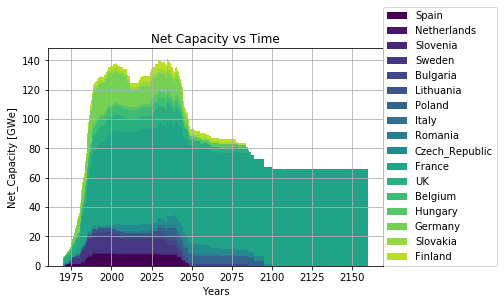

In [233]:
# Display Net Capacity vs Time
from IPython.display import Image
Image(filename='power_plot.png')

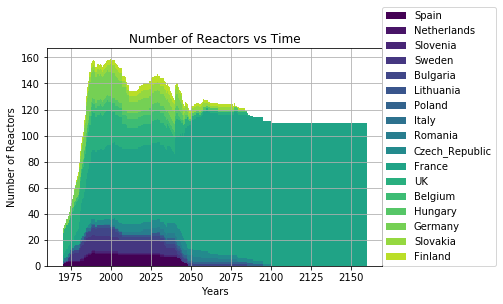

In [197]:
# Display Number of Reactors vs Time
from IPython.display import Image
Image(filename='num_plot.png')

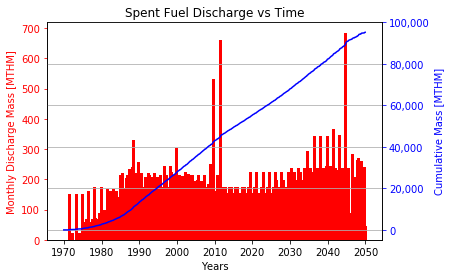

In [198]:
# Display natural U demand  vs Time
from IPython.display import Image
Image(filename='cum_mass_snf_discharge.png')

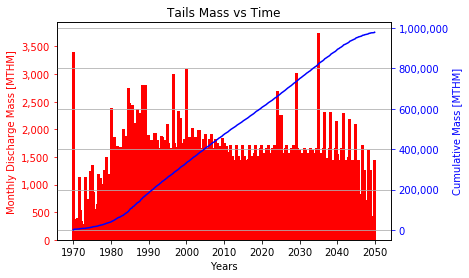

In [199]:
# Display spent fuel vs Time
from IPython.display import Image
Image(filename='tails_tailings.png')

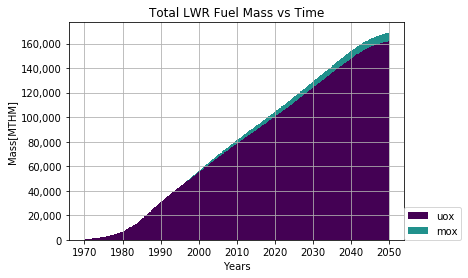

In [200]:
# Display total fuel usage  vs Time
from IPython.display import Image
Image(filename='total_fuel.png')